<a href="https://colab.research.google.com/github/helly-22/Predictive-Maintenance-IoT/blob/main/PredictiveMaintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

# New Section

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
data = pd.read_csv('prob1.csv')
data

,Accelerometer,Temperature,freq_x,a_x,freq_y,a_y,freq_z,a_z,vib_x,vib_y,vib_z,AnomalyDetect,MaintainPeriod
0,62.99,123.27,99.36,0.0054,62.92,0.0022,52.98,0.0069,18400.00000,28600.00000,7678.260870,0,0
1,61.40,125.86,86.42,0.0059,67.33,0.0028,50.14,0.0066,14647.45763,24046.42857,7596.969697,0,0
2,63.16,139.13,90.46,0.0045,68.20,0.0020,46.10,0.0070,20102.22222,34100.00000,6585.714286,0,0
3,50.00,131.37,90.84,0.0044,75.70,0.0029,51.93,0.0060,20645.45455,26103.44828,8655.000000,1,1
4,62.78,139.62,92.04,0.0058,74.15,0.0021,56.81,0.0066,15868.96552,35309.52381,8607.575758,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,60.53,138.10,86.46,0.0057,69.32,0.0018,55.86,0.0073,15168.42105,38511.11111,7652.054795,0,0
295,64.13,121.78,87.99,0.0053,62.19,0.0029,50.99,0.0061,16601.88679,21444.82759,8359.016393,0,0
296,60.76,122.98,84.62,0.0021,70.25,0.0024,51.53,0.0066,40295.23810,29270.83333,7807.575758,1,4
297,61.72,129.72,91.75,0.0051,76.65,0.0019,55.77,0.0078,17990.19608,40342.10526,7150.000000,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Accelerometer   299 non-null    float64
 1   Temperature     299 non-null    float64
 2   freq_x          299 non-null    float64
 3   a_x             299 non-null    float64
 4   freq_y          299 non-null    float64
 5   a_y             299 non-null    float64
 6   freq_z          299 non-null    float64
 7   a_z             299 non-null    float64
 8   vib_x           299 non-null    float64
 9   vib_y           299 non-null    float64
 10  vib_z           299 non-null    float64
 11  AnomalyDetect   299 non-null    int64  
 12  MaintainPeriod  299 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 30.5 KB


In [ ]:
data.describe()

,Accelerometer,Temperature,freq_x,a_x,freq_y,a_y,freq_z,a_z,vib_x,vib_y,vib_z,AnomalyDetect,MaintainPeriod
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,61.933946,130.210702,90.391171,0.004997,70.676555,0.001960,53.281171,0.006947,18622.969174,41159.735860,7813.606863,0.147157,0.424749
std,4.211649,6.954529,8.480899,0.000711,6.863321,0.000611,5.567801,0.000765,4568.051702,23776.703965,1641.947060,0.354856,1.213814
min,24.000000,120.150000,80.200000,0.001600,60.020000,0.000200,45.050000,0.002400,13827.586210,20013.333330,5710.000000,0.000000,0.000000
25%,60.995000,124.345000,84.610000,0.004500,65.480000,0.001400,49.310000,0.006550,16097.390110,28080.032465,6945.070422,0.000000,0.000000
50%,62.340000,130.100000,89.840000,0.005100,70.610000,0.001900,52.980000,0.007000,17844.444440,36800.000000,7593.670886,0.000000,0.000000
75%,63.750000,134.905000,94.535000,0.005600,75.830000,0.002500,56.515000,0.007500,20122.418480,49560.000000,8287.178309,0.000000,0.000000
max,65.000000,168.000000,183.000000,0.006000,108.000000,0.003000,94.000000,0.008000,55000.000000,353350.000000,21354.166670,1.000000,7.000000


In [ ]:
df = data
data.drop(['freq_x', 'a_x', 'freq_y', 'a_y', 'freq_z', 'a_z'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Accelerometer   299 non-null    float64
 1   Temperature     299 non-null    float64
 2   vib_x           299 non-null    float64
 3   vib_y           299 non-null    float64
 4   vib_z           299 non-null    float64
 5   AnomalyDetect   299 non-null    int64  
 6   MaintainPeriod  299 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 16.5 KB


In [ ]:
# To check for anymissing or duplicate values

print('Missing values in the dataset : ',data.isna().sum().sum())
print('Duplicate values in the dataset : ',data.duplicated().sum())

Missing values in the dataset :  0
Duplicate values in the dataset :  0


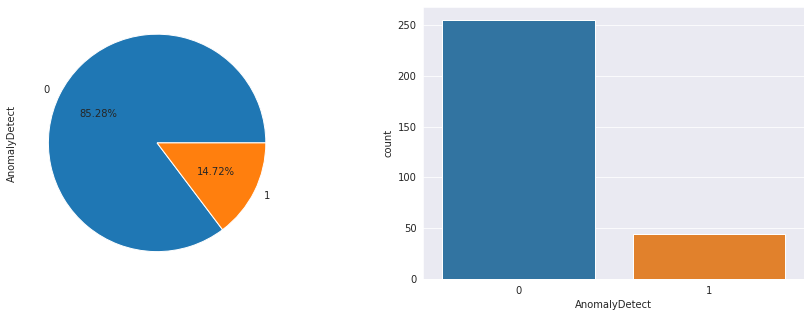

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data['AnomalyDetect'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'AnomalyDetect', data = data)
plt.show()

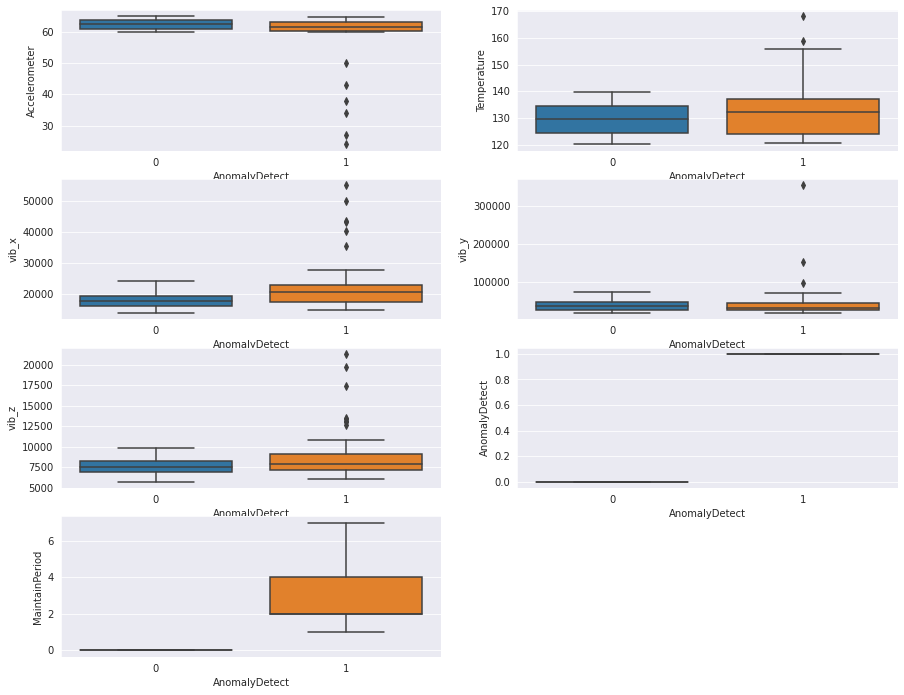

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(data.columns):
    plt.subplot(5,2,i+1)
    sns.boxplot(y = col, x = 'AnomalyDetect', data = data)
plt.show()

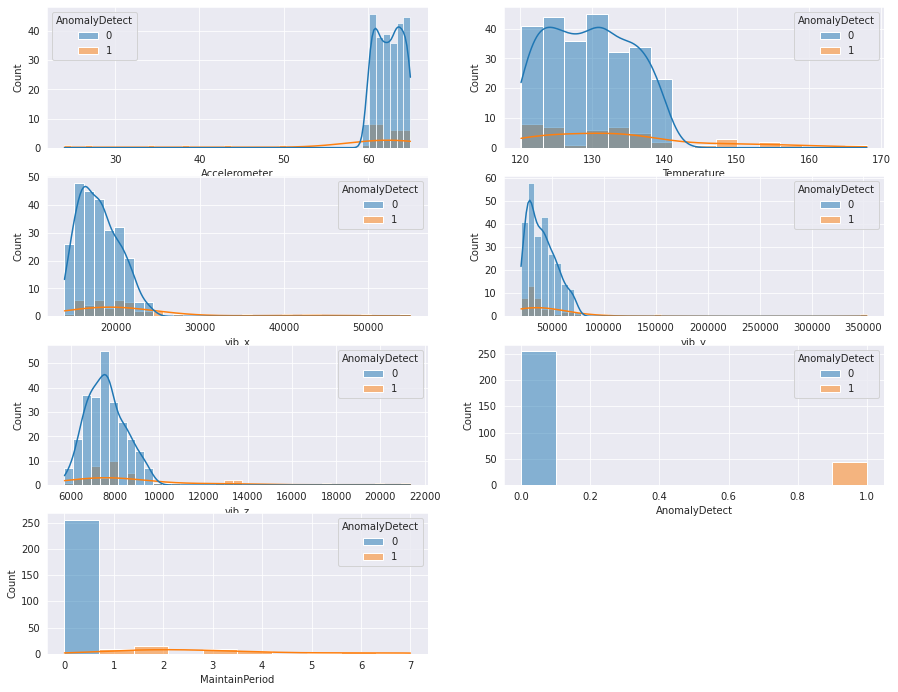

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(data.select_dtypes('number').columns):
    plt.subplot(5,2,i+1)
    sns.histplot(x = col, data = data, kde = True, hue = 'AnomalyDetect')
plt.show()

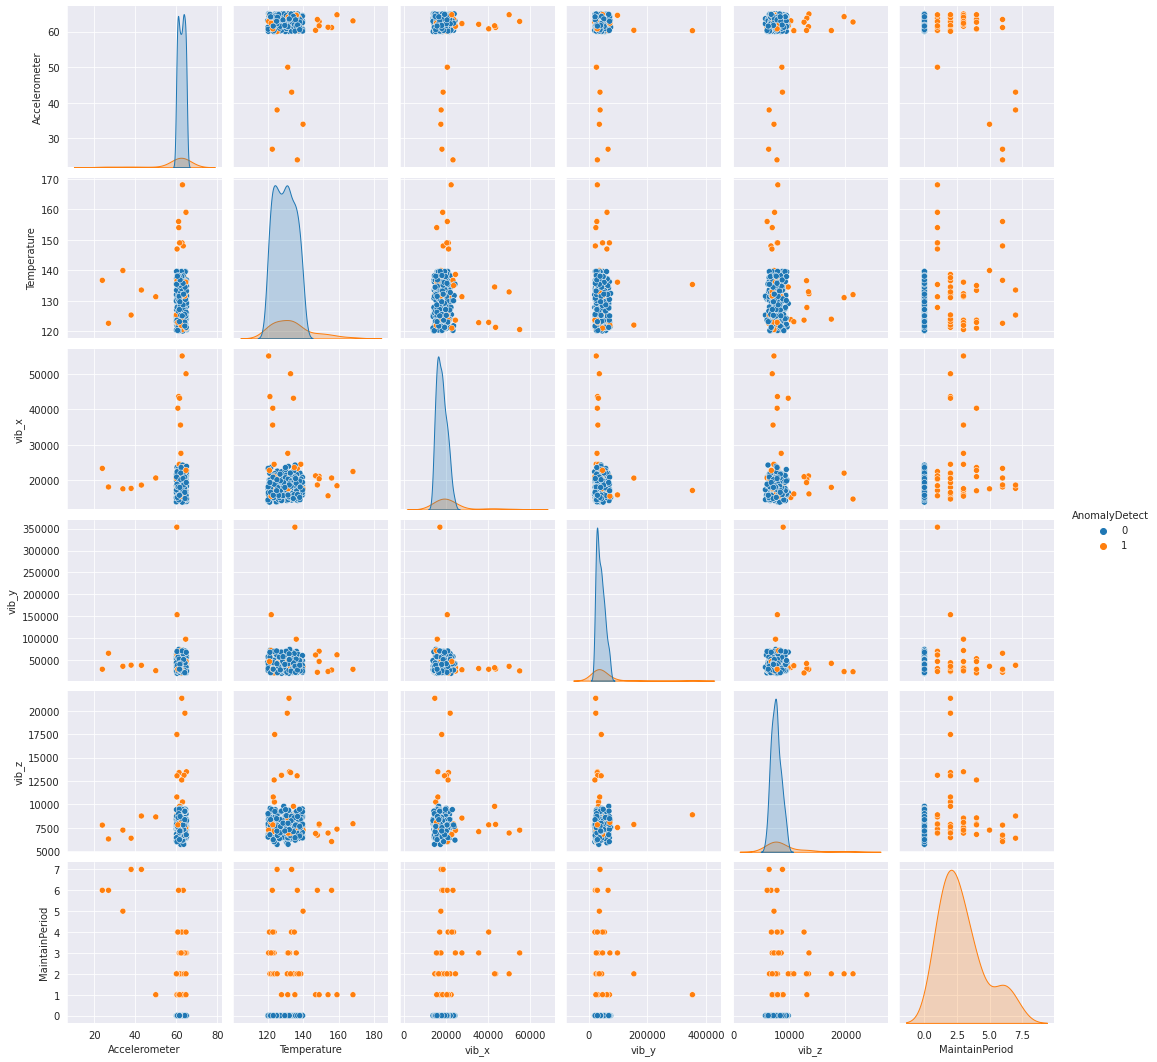

In [ ]:
sns.pairplot(data, hue = 'AnomalyDetect')
plt.show()

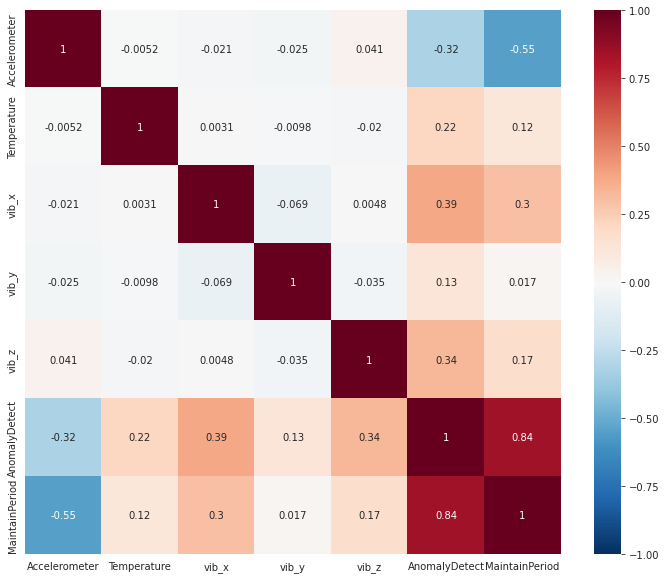

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), vmin = -1.0, vmax = 1.0, center = 0, cmap = 'RdBu_r', annot = True)
plt.show()

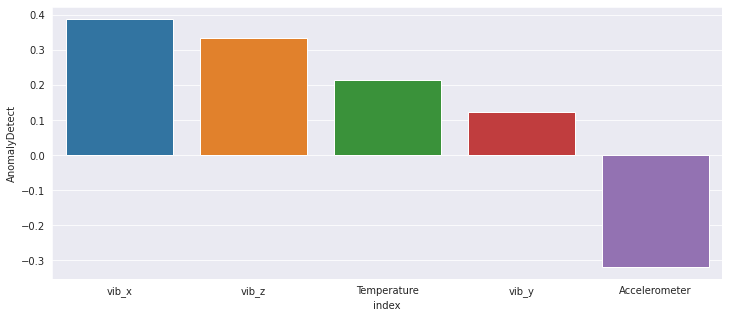

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'index', y = 'AnomalyDetect',data = data.corr()['AnomalyDetect'].sort_values(ascending = False).reset_index()[2:])
plt.show()

# Training the actual prediction model

In [ ]:
y_train = data.iloc[:,5]
y_train

0      0
1      0
2      0
3      1
4      0
      ..
294    0
295    0
296    1
297    0
298    0
Name: AnomalyDetect, Length: 299, dtype: int64

In [ ]:
x_train = data.iloc[:,0:5]
x_train

,Accelerometer,Temperature,vib_x,vib_y,vib_z
0,62.99,123.27,18400.00000,28600.00000,7678.260870
1,61.40,125.86,14647.45763,24046.42857,7596.969697
2,63.16,139.13,20102.22222,34100.00000,6585.714286
3,50.00,131.37,20645.45455,26103.44828,8655.000000
4,62.78,139.62,15868.96552,35309.52381,8607.575758
...,...,...,...,...,...
294,60.53,138.10,15168.42105,38511.11111,7652.054795
295,64.13,121.78,16601.88679,21444.82759,8359.016393
296,60.76,122.98,40295.23810,29270.83333,7807.575758
297,61.72,129.72,17990.19608,40342.10526,7150.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)

In [ ]:
KNN = KNeighborsClassifier

In [ ]:
np.all(np.isfinite(x_train))

True

In [ ]:
knn = KNN(n_neighbors=3)

# fit the model to the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_train)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
data.insert(6,'AnomalyPred', y_pred )

In [ ]:
data

,Accelerometer,Temperature,vib_x,vib_y,vib_z,AnomalyDetect,AnomalyPred,MaintainPeriod
0,62.99,123.27,18400.00000,28600.00000,7678.260870,0,0,0
1,61.40,125.86,14647.45763,24046.42857,7596.969697,0,0,0
2,63.16,139.13,20102.22222,34100.00000,6585.714286,0,0,0
3,50.00,131.37,20645.45455,26103.44828,8655.000000,1,0,1
4,62.78,139.62,15868.96552,35309.52381,8607.575758,0,0,0
...,...,...,...,...,...,...,...,...
294,60.53,138.10,15168.42105,38511.11111,7652.054795,0,0,0
295,64.13,121.78,16601.88679,21444.82759,8359.016393,0,0,0
296,60.76,122.98,40295.23810,29270.83333,7807.575758,1,1,4
297,61.72,129.72,17990.19608,40342.10526,7150.000000,0,0,0


In [ ]:
knn.predict_proba(x_train)[:,0]

array([1.        , 0.66666667, 1.        , 0.66666667, 0.66666667,
       0.66666667, 0.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 1.        , 0.66666667, 0.33333333,
       1.        , 1.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 0.66666667, 1.        , 0.66666667, 1.        ,
       0.66666667, 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 0.66666667, 0.66666667, 0.66666667,
       1.        , 0.33333333, 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

Model accuracy score: 0.9097


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred)

print('Confusion matrix\n\n', cm)
TP = cm[0,0]
print('\nTrue Positives(TP) = ', TP)
TN = cm[1,1]
print('\nTrue Negatives(TN) = ', TN)
FP = cm[0,1]
print('\nFalse Positives(FP) = ', FP)
FN = cm[1,0]
print('\nFalse Negatives(FN) = ', FN)

Confusion matrix

 [[253   2]
 [ 25  19]]

True Positives(TP) =  253

True Negatives(TN) =  19

False Positives(FP) =  2

False Negatives(FN) =  25


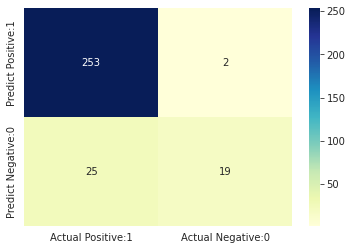

In [ ]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0903


In [ ]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9922


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9101


# Making a linear Regression model for predictin of maintainence

In [ ]:
import pandas
from sklearn import linear_model

In [ ]:
X = data.iloc[:,0:5]
y = data.iloc[:,7]

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [ ]:
y_pred_linreg = regr.predict(X)
y_pred_linreg

array([ 4.80291871e-02,  4.61932332e-02,  3.47609416e-01,  2.61477764e+00,
        3.84690106e-01,  1.10851391e+00,  2.29320136e+00,  4.26982675e-01,
       -3.34715581e-01,  1.76743499e-01, -4.75914597e-01,  3.73634330e-01,
       -2.06023713e-01, -4.70174689e-03,  7.89951288e-02,  1.12919795e-02,
        6.86910799e-01,  8.43365004e-01,  1.86982385e-01,  1.37305691e+00,
        1.80791762e-01,  2.44519446e-01, -3.04688170e-02,  4.82754183e-01,
        6.07080097e-01,  1.68628120e-01, -9.07024086e-02,  6.70602848e-01,
        5.21589595e-01,  6.56772799e-01,  6.80073630e-01,  2.88488157e-01,
        6.51771611e-01,  1.80782643e-01,  1.57406854e+00, -5.74244746e-01,
        1.90304899e-01, -1.75475343e-02,  5.91928688e-02,  6.55035193e-01,
        7.93207529e-01,  2.49922042e-01,  4.25805890e-01,  2.60470691e-01,
        5.08088193e-01,  9.64394806e-01,  1.59760867e-01,  1.53852599e-01,
        3.49229228e-01,  5.62602613e+00, -3.06813080e-02,  8.98228284e-01,
        1.53009966e-01,  

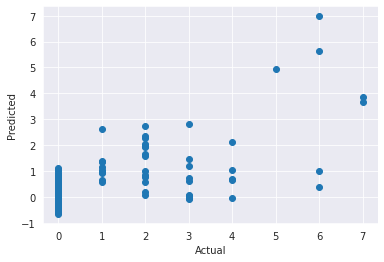

In [ ]:
plt.scatter(y, y_pred_linreg);
plt.xlabel('Actual');
plt.ylabel('Predicted');

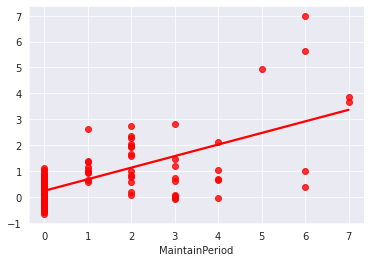

In [ ]:
sns.regplot(x=y, y=y_pred_linreg, ci=None, color ='red');

# Taking the value using MQTT

In [ ]:
!sudo pip install paho-mqtt
!sudo apt-get install python-dev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 8.8 MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62133 sha256=dd711fc73e03e0febe4591ad8f988d9d59cc333a9c0d95189ec5fb84d051573a
  Stored in directory: /root/.cache/pip/wheels/d0/bf/ac/2b3f43f8c6fcd0f4ba5395397458c521eb0b52d33b574a5a40
Successfully built paho-mqtt
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [ ]:
import os
import time
import sys
import paho.mqtt.client as mqtt
import json
import random

In [ ]:
def on_connect(client, userdata, flags, rc):
    print('CONNACK received with code %d.' % (rc))

In [ ]:
import paho

In [ ]:
client = mqtt.Client()
client.on_connect = on_connect
client.connect('broker.hivemq.com', 1883)

0

In [ ]:
mqtt.Client(client_id='1', clean_session=True, userdata=None, protocol=mqtt.MQTTv31)

In [ ]:
msg = None

In [ ]:
def on_publish(client, userdata, mid):
    print("mid: "+str(mid))

In [ ]:
def run():
    client = connect_mqtt()
    subscribe(client)
    client.loop_forever()

In [ ]:
client = mqtt.Client()
client.on_publish = on_publish
client.connect('broker.mqttdashboard.com', 1883)
client.loop_start()

In [ ]:
def on_message(client, userdata, message):
    print("received message: " ,str(message.payload.decode("utf-8")))

In [ ]:
def subscribe(client):
    def on_message(client, userdata, msg):
        print(f"Received `{msg.payload.decode()}` from `{msg.topic}` topic")

In [ ]:
def connect_mqtt() -> client:
    def on_connect(client, userdata, flags, rc):
        if rc == 0:
            print("Connected to MQTT Broker!")
        else:
            print("Failed to connect, return code %d\n", rc)

In [ ]:
topic = "ConveyorBelt1"

In [ ]:
client.subscribe(topic)
client.on_message = on_message

In [ ]:
while True:
    characters = [chr(ascii) for ascii in msg.payload] # Convert ASCII to char
    chars_joined = ''.join(characters) # Join chars to a string
    splitted = chars_joined.split(",")
    acc = splitted[0]
    temp = splitted[1]
    freq_x = splitted[2]
    a_x = splitted[3]
    freq_y = splitted[4]
    a_y = splitted[5]
    freq_z = splitted[6]
    a_z = splitted[7]

    time.sleep(30)

In [ ]:
vib_x = freq_x/a_x
vib_y = freq_y/a_y
vib_z = freq_z/a_z

# Testing data

In [ ]:
import random

In [ ]:
acc1 = 40+(random.random()*35)
temp1 = 150+(random.random()*25)
freq_x1 = 80+(random.random()*25)
a_x1 = random.random()*0.002
freq_y1 = 60+(random.random()*10)
a_y1 = random.random()*0.001
freq_z1 = 50+(random.random()*10)
a_z1 = random.random()*0.006

In [ ]:
vib_x1 = freq_x/a_x
vib_y1 = freq_y/a_y
vib_z1 = freq_z/a_z

In [ ]:
acc2 = 40+(random.random()*35)
temp2 = 150+(random.random()*25)
freq_x2 = 80+(random.random()*25)
a_x2 = random.random()*0.002
freq_y2 = 60+(random.random()*10)
a_y2 = random.random()*0.001
freq_z2 = 50+(random.random()*10)
a_z2 = random.random()*0.006

In [ ]:
vib_x2 = freq_x/a_x
vib_y2 = freq_y/a_y
vib_z2 = freq_z/a_z

In [ ]:
x_test = [[acc1, temp1, vib_x1, vib_y1, vib_z1], [acc2, temp2, vib_x2, vib_y2, vib_z2]]
x_test

[[58.50735587268213,
  164.85232221634635,
  80608.61914278152,
  77935.05340237916,
  63353.979825901515],
 [71.4449240044764,
  158.653256468274,
  80608.61914278152,
  77935.05340237916,
  63353.979825901515]]

In [ ]:
y_pred_test = knn.predict(x_test)

In [ ]:
y_pred_test

array([1, 1])

# Sending an alert

In [ ]:
pip install telebot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.10.0-py3-none-any.whl size=205421 sha256=cd2ae16c2e109f4211aae8a923088f6cee676b25220854e3cbba5b193a0554af
  Stored in directory: /root/.cache/pip/wheels/ef/ba/4b/187be68f61aa7818b28d8b21200d130fd35ba36f002efcc262
Successfully built pyTelegramBotAPI


In [ ]:
pip install telebot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install telethon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.5/600.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26364 sha256=df0b7d94f18bbc724854d99979b5b9f6d9fd5bed3793bd142cab2a2b275fca9a
  Stored in directory: /root/.cache/pip/wheels/33/13/e9/ef9894385084d8e4fab38f5f83afda49a3d593d8afc907c8fd
Successfully built pyaes


In [ ]:
import telebot
from telethon.sync import TelegramClient
from telethon.tl.types import InputPeerUser, InputPeerChannel
from telethon import TelegramClient, sync, events

In [ ]:
api_id = '24804615'
api_hash = 'd5c6f0ad6aaa15006851468f6a064eda'
token = '5627588564:AAGrYQQJMky9q3XbMRg68JZ08ZIvuFboQT4'
message = "Working..."

In [ ]:
phone = '+919004979252'

client = TelegramClient('session', api_id, api_hash)

client.connect()

<coroutine object TelegramBaseClient.connect at 0x7fbcc77a1440>

In [ ]:
import urllib.request

In [ ]:
webUrl = urllib.request.urlopen('https://api.telegram.org/bot5627588564:AAGrYQQJMky9q3XbMRg68JZ08ZIvuFboQT4/sendMessage?chat_id=1839649176&text=MaintainenceRequired')

# Scheduling

In [ ]:
from google.colab import auth
from googleapiclient.discovery import build
from apiclient.http import MediaIoBaseDownload
from google.oauth2 import service_account
import datetime

try:
    from google.cloud import storage
    from googleapiclient import discovery

except:
    !pip install --upgrade google-cloud-storage google-api-client
    from google.cloud import storage
    from googleapiclient import discovery

In [ ]:
CLIENT_SECRET_FILE = "client_secret_file_cal1.json"
API_NAME = 'calander'
API_VERSION = 'v3'
SCOPES = ['https://www.googleapis.com/auth/calander']

In [ ]:
def reset_auth():
    !rm -v = *.json

STORAGE_BUCKET="archive.h-lo.me"
STORAGE_PATH = "credentials/"
PROJECT="colab-datalab-nbooks"
SA_FILE="colab-datalab-nbooks-0b23b6ee2449.json"

auth.authenticate_user()
storage_client = storage.Client(PROJECT)

SCOPES = ['https://www.googleapis.com/auth/calendar']

!rm '$SA_FILE'

download_blob(STORAGE_BUCKET, STORAGE_PATH+SA_FILE, SA_FILE)

credentials = service_account.Credentials.from_service_account_file(
        SA_FILE, scopes=SCOPES).with_subject('confusedhelly@gmail.com')

# drive  = discovery.build('drive', 'v3', credentials=credentials)
# sheets = discovery.build('sheets','v4', credentials=credentials)
calendar = discovery.build('calendar','v3', credentials=credentials)

In [ ]:
from __future__ import print_function

import datetime
import os.path

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/calendar.readonly']


def main():
    """Shows basic usage of the Google Calendar API.
    Prints the start and name of the next 10 events on the user's calendar.
    """
    creds = None
    # The file token.json stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

    try:
        service = build('calendar', 'v3', credentials=creds)

        # Call the Calendar API
        now = datetime.datetime.utcnow().isoformat() + 'Z'  # 'Z' indicates UTC time
        print('Getting the upcoming 10 events')
        events_result = service.events().list(calendarId='primary', timeMin=now,
                                              maxResults=10, singleEvents=True,
                                              orderBy='startTime').execute()
        events = events_result.get('items', [])

        if not events:
            print('No upcoming events found.')
            return

        # Prints the start and name of the next 10 events
        for event in events:
            start = event['start'].get('dateTime', event['start'].get('date'))
            print(start, event['summary'])

    except HttpError as error:
        print('An error occurred: %s' % error)


if __name__ == '__main__':
    main()

In [ ]:
!pip install gcsa

In [ ]:
from gcsa.google_calendar import GoogleCalendar

calendar = GoogleCalendar('confusedhelly@gmail.com')
for event in calendar:
    print(event)

## Sending email

In [ ]:
import smtplib, ssl

In [ ]:
mach = "Conveyor Belt"

In [ ]:
port = 465  # For SSL
smtp_server = "smtp.gmail.com"
sender_email = "helly.dhamesha2020@vitstudent.ac.in"
receiver_email = "rahul.gandhi2020@vitstudent.ac.in"
password = "Helly#1704"
subject = "IOT predictive maintenance"
message = "Maintenance required for " + mach + "in 2 days"

In [ ]:
context = ssl.create_default_context()
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, subject, message)